**Note, this work is to determine how ocean proximity and median house values affects house values in California**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [7]:
x=data[['median_income','ocean_proximity']].values
y = data['median_house_value'].values

In [8]:
x

array([[8.3252, 'NEAR BAY'],
       [8.3014, 'NEAR BAY'],
       [7.2574, 'NEAR BAY'],
       ...,
       [1.7, 'INLAND'],
       [1.8672, 'INLAND'],
       [2.3886, 'INLAND']], dtype=object)

In [9]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X=np.array(ct.fit_transform(x))

In [11]:
X

array([[0.0, 0.0, 0.0, 1.0, 0.0, 8.3252],
       [0.0, 0.0, 0.0, 1.0, 0.0, 8.3014],
       [0.0, 0.0, 0.0, 1.0, 0.0, 7.2574],
       ...,
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.7],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.8672],
       [0.0, 1.0, 0.0, 0.0, 0.0, 2.3886]], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = reg.predict(x_test)

In [17]:
y_pred

array([248950.38350682, 276695.14984827, 252589.28290219, ...,
        88625.40628469, 222553.63050414, 200734.9665181 ])

In [18]:
y_test

array([190600., 399400., 176600., ...,  88800., 190400., 147200.])

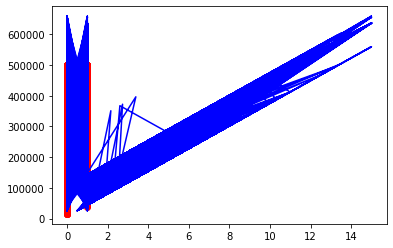

In [20]:
plt.scatter(x_train[:,0],y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')

In [21]:
reg.score(x_train,y_train)

0.5880650283919631

In [ ]:
reg.score(x_test,y_test)

0.5713460409196137

TRYING THE MULTIPLE LINEAR REGRESION